In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

import sys
sys.path.append('../src')

from classes.data.satellite_image import SatelliteImage


SEUIL SUR LE 75è PERCENTILE DU NDBI

In [35]:
dir = '../data/seuillage/'
list_paths = os.listdir(dir)
list_paths = [dir + path for path in list_paths]

dep = 976
year = 2022
n_bands = 12

11844


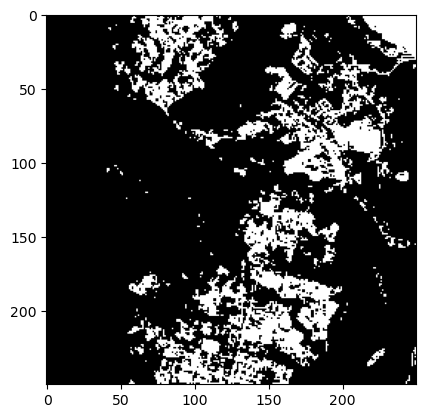

In [78]:
for path in list_paths:
    image = SatelliteImage.from_raster(
        file_path=path,
        dep=dep,
        date=year,
        n_bands=n_bands,
    )

    array = image.array
    
    NDBI = np.ones((250,250))
    NDVI = np.ones((250,250))
    NDWI = np.ones((250,250))
    
    for i in range(250):
        for j in range(250):
            NDBI[i][j] = (int(array[10,i,j])-int(array[7,i,j]))/(int(array[10,i,j])+int(array[7,i,j]))
            NDVI[i][j] = (int(array[7,i,j])-int(array[3,i,j]))/(int(array[7,i,j])+int(array[3,i,j]))
            NDWI[i][j] = (int(array[2,i,j])-int(array[7,i,j]))/(int(array[2,i,j])+int(array[7,i,j]))
        
    NDBI_perc75 = np.percentile(NDBI,75)
    NDVI_perc25 = np.percentile(NDVI,25)
    NDWI_perc95 = np.percentile(NDWI,95)

    masque = np.zeros((250,250))
    for i in range(250):
        for j in range(250):
            if NDBI[i,j] >= NDBI_perc75 and NDVI[i,j] <= NDVI_perc25:# and NDWI[i,j] >= -0.9 and NDWI[i,j] <= 0.3:
                masque[i,j] = 1

print(np.where(masque==1)[0].shape[0])

plt.imshow(masque,cmap='gray')
plt.show()
